<a href="https://colab.research.google.com/github/tlhhogi123/EDA-/blob/main/Project_4_level_1%20sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4 Level 1

# **Twitter Sentiment Data Analysis**

Context

The dataset has three sentiments namely, negative(-1), neutral(0), and positive(+1). It contains two fields for the tweet and label.

In [1]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Natural Language Processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Libraries for machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Text preprocessing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [65]:
df = pd.read_csv('Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [3]:
# Check the first few rows
print(data.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [32]:
# Define a function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove mentions (@username)
    text = re.sub(r"@\w+", "", text)
    # Remove hashtags (keep the text but remove '#')
    text = re.sub(r"#", "", text)
    # Remove special characters, numbers, and punctuations
    text = re.sub(r"[^A-Za-z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = text.strip()
    return text

In [46]:
# Display cleaned text
print("\nClean tweet:")
print(clean_text(data['clean_text'][0]))


Clean tweet:
when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples


In [47]:
# Remove stopwords and apply stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and apply stemming
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(filtered_words)


In [59]:
# Save the cleaned dataset to a new CSV file
data.to_csv("Cleaned_Twitter_Data.csv", index=False)


In [57]:
print("\nCleaned data saved as 'Cleaned_Twitter_Data.csv'.")


Cleaned data saved as 'Cleaned_Twitter_Data.csv'.


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [67]:
df.category.value_counts()

,count
category,
1.0,72250
0.0,55213
-1.0,35510


In [68]:
print(df['clean_text'][19])
print(df['clean_text'][91])

didn’ write chowkidar does mean ’ anti modi try visit the plz not all who haven’ used are anti 
dont forget petrol prices have risen ₹ modi government when gulf prices were going down ाेशबचा 


In [69]:
any_nan_in_A = df['clean_text'].isna().any()
print(any_nan_in_A)

True


In [70]:
df['clean_text'] = df['clean_text'].fillna('')

In [71]:
df = df.dropna()

In [72]:
any_nan_in_A = df['category'].isna().any()
print(any_nan_in_A)

False


In [81]:
df2 =df1.copy()
df2 = df1[df1.category != 0.0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107760 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  107760 non-null  object 
 1   category    107760 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [82]:
df2 = df2.drop_duplicates(subset=['clean_text'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107734 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  107734 non-null  object 
 1   category    107734 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


# **Exploratory data analysis**

In [87]:
df_test = df3.copy()
category = df_test['category']
mapped_labels = [0 if label == -1 else 1 for label in category]
df_test['category'] = mapped_labels
df_test.head()

,clean_text,category
0,when modi promised “minimum government maximum...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
8,with upcoming election india saga going import...,1


In [88]:
display(df_test.describe())

# Print the info
print(df_test.info())

,category
count,107734.000000
mean,0.670429
std,0.470060
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


<class 'pandas.core.frame.DataFrame'>
Index: 107734 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  107734 non-null  object
 1   category    107734 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB
None


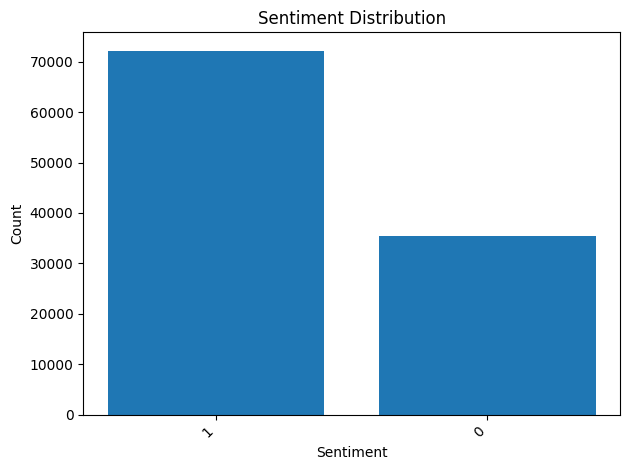

In [89]:
# Calculate sentiment counts
sentiment_counts = df_test['category'].value_counts()

# Get values for x-axis and y-axis
x = sentiment_counts.index.astype(str).to_list()  # Ensure string labels for x-axis
y = sentiment_counts.values.tolist()

# Create the bar chart
plt.bar(x, y)

# Customize the plot
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust layout for better visibility
plt.tight_layout()

# Display the plot
plt.show()



In [90]:
df4 = df_test.copy()
df4['word_count'] = df_test['clean_text'].apply(lambda x : len(x.split()))
df4['char_count'] = df_test['clean_text'].apply(lambda x : len(x.replace(" ","")))
df4['word_density'] = df4['word_count'] / (df4['char_count'] + 1)

df4[['word_count', 'char_count', 'word_density']].head()

,word_count,char_count,word_density
0,33,178,0.184358
2,22,95,0.229167
3,34,179,0.188889
4,14,67,0.205882
8,24,132,0.180451


In [91]:
def plot_distribution_by_category(df, column, start, end, size, category_type):
    # Filter data based on category
    negative_df = df[df['category'] == 0]
    positive_df = df[df['category'] == 1]

    # Define bins for histogram
    bins = np.arange(start, end + size, size)

    # Create subplots with 1 row and 2 columns (for negative, positive)
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figure size as needed

    # Plot histograms for each category in separate subplots
    ax[0].hist(negative_df[column], bins=bins, color='orange', alpha=0.75)
    ax[0].set_title('Negative Tweets')
    ax[0].set_xlabel(f'Tweet Length {category_type}')
    ax[0].set_ylabel('Number of Tweets')

    ax[1].hist(positive_df[column], bins=bins, color='blue', alpha=0.75)
    ax[1].set_title('Positive Tweets')
    ax[1].set_xlabel(f'Tweet Length {category_type}')
    ax[1].set_ylabel('Number of Tweet')

    # Adjust layout to prevent overlap of labels
    plt.tight_layout()

    # Show plot
    plt.show()

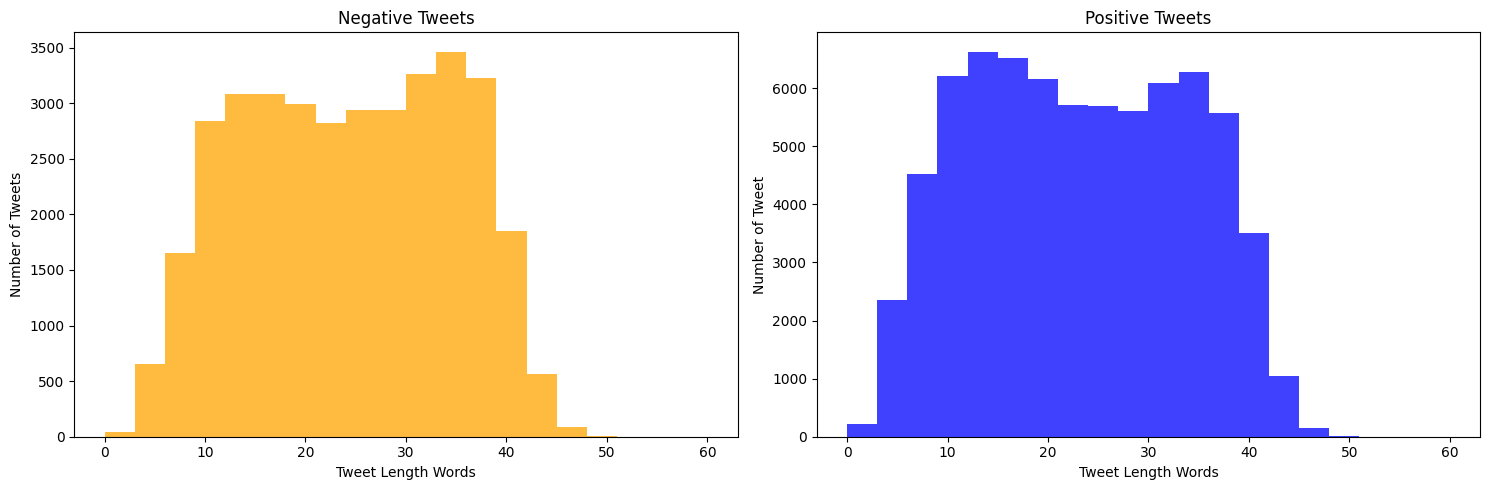

In [92]:
plot_distribution_by_category(df4, 'word_count', 0, 60, 3,'Words')

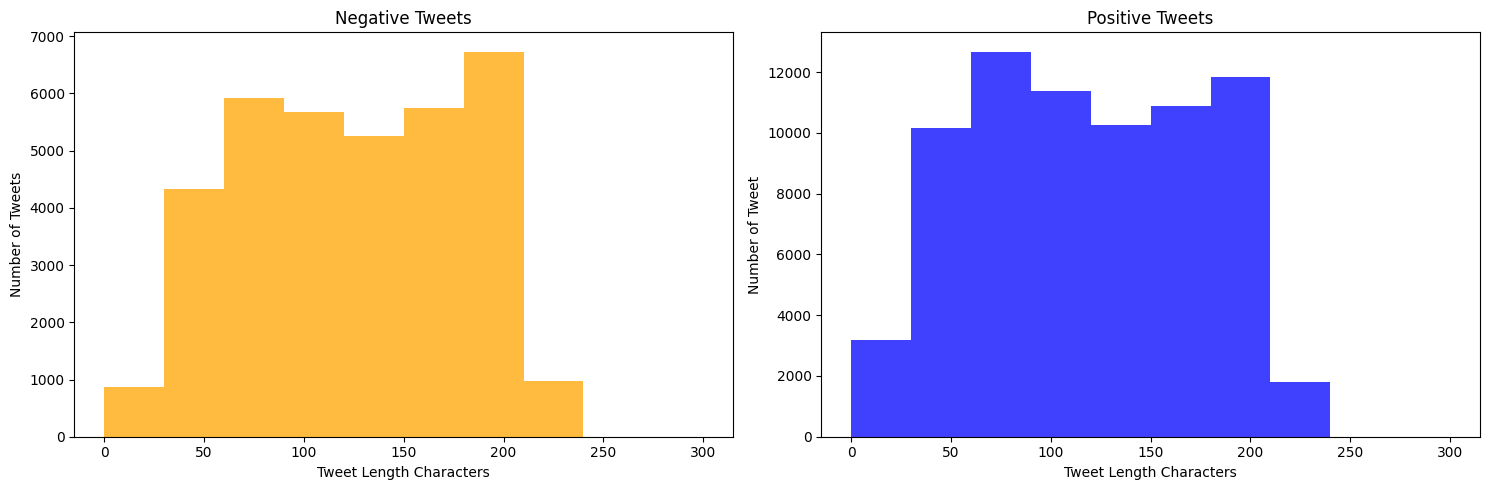

In [93]:
plot_distribution_by_category(df4, 'char_count', 0, 300, 30,'Characters')

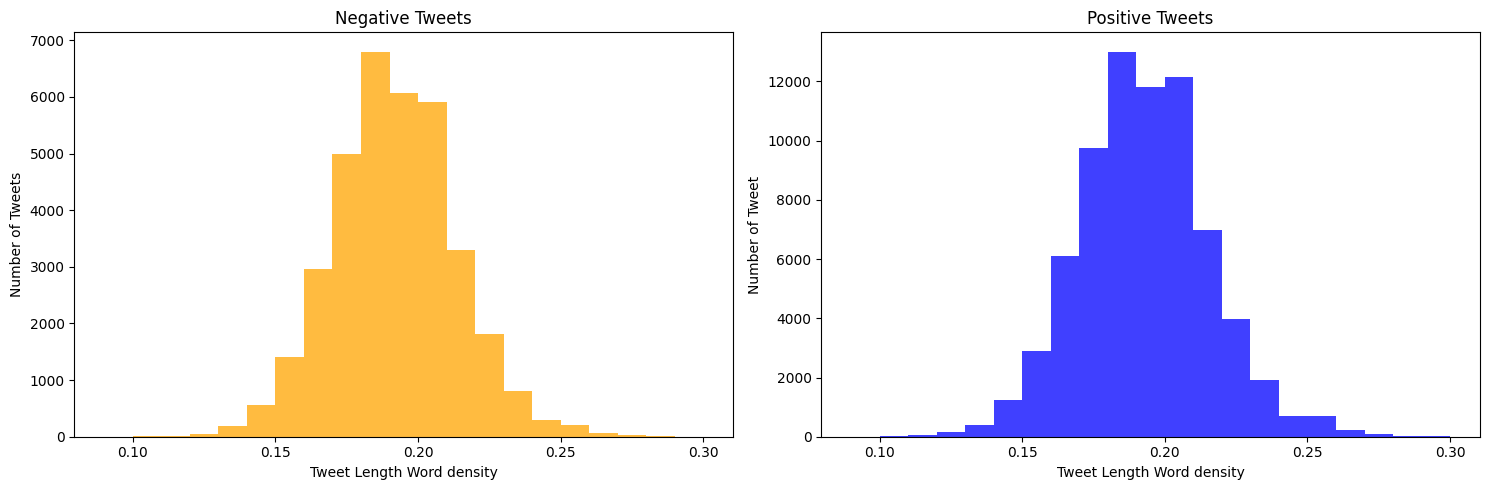

In [94]:
plot_distribution_by_category(df4,'word_density', 0.09, 0.3, .01,'Word density')

In [95]:
positive_tweets = df4[df4['category'] == 1.0]
negative_tweets = df4[df4['category'] == 0.0]

In [96]:
df4.head()

,clean_text,category,word_count,char_count,word_density
0,when modi promised “minimum government maximum...,0,33,178,0.184358
2,what did just say vote for modi welcome bjp t...,1,22,95,0.229167
3,asking his supporters prefix chowkidar their n...,1,34,179,0.188889
4,answer who among these the most powerful world...,1,14,67,0.205882
8,with upcoming election india saga going import...,1,24,132,0.180451


# **Saving the data**

In [98]:
df4.to_csv('refined_tweet_data.csv',encoding = 'utf-8-sig')

# Baseline Model

In [105]:
X = df4['clean_text']
Y = df4['category']

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    stratify = Y,
                                                    random_state = 34)

In [107]:
#Initialize the tf-id vectorizer
vectorizer = TfidfVectorizer(strip_accents='ascii')

#Using the vectorizer to fit on out training data and testing data
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [111]:
# Create a Majority Class Classifier
from sklearn.dummy import DummyClassifier
majority_classifier = DummyClassifier(strategy='most_frequent')
majority_classifier.fit(tfidf_train, Y_train)

# Predict the majority class for all instances in the test set
y_pred_majority = majority_classifier.predict(tfidf_test)

In [112]:
# Print classification report
print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred_majority))


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7101
           1       0.67      1.00      0.80     14446

    accuracy                           0.67     21547
   macro avg       0.34      0.50      0.40     21547
weighted avg       0.45      0.67      0.54     21547



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Traditional Machine Learning

**Naive Bayes**

In [113]:
# df4 = pd.read_csv('refined_tweet_data.csv')

In [114]:
#Initialize the Multinomial Naive Bayes classifier
best_accuracy = 0
a = 0.1
while a <= 1:
  nb = MultinomialNB(alpha=a)

  #Fitting the model
  nb.fit(tfidf_train, Y_train)
  curr_accuracy = nb.score(tfidf_test, Y_test)
  print(f"Accuracy with alpha {a}: {curr_accuracy}")
  # Predict the labels
  if curr_accuracy > best_accuracy:
    best_accuracy = curr_accuracy
    y_pred = nb.predict(tfidf_test)
  a = a + 0.05

Accuracy with alpha 0.1: 0.7794588573815381
Accuracy with alpha 0.15000000000000002: 0.776117324917622
Accuracy with alpha 0.2: 0.7727757924537059
Accuracy with alpha 0.25: 0.7678563141040516
Accuracy with alpha 0.3: 0.7625655543695178
Accuracy with alpha 0.35: 0.7568571030769945
Accuracy with alpha 0.39999999999999997: 0.7526801874970994
Accuracy with alpha 0.44999999999999996: 0.7471109667239059
Accuracy with alpha 0.49999999999999994: 0.7419594375087019
Accuracy with alpha 0.5499999999999999: 0.7372720100245974
Accuracy with alpha 0.6: 0.7332343249640321
Accuracy with alpha 0.65: 0.7294286907690166
Accuracy with alpha 0.7000000000000001: 0.725669466747111
Accuracy with alpha 0.7500000000000001: 0.7214461409941059
Accuracy with alpha 0.8000000000000002: 0.7188471712999489
Accuracy with alpha 0.8500000000000002: 0.7163410219520119
Accuracy with alpha 0.9000000000000002: 0.7135564115654152
Accuracy with alpha 0.9500000000000003: 0.7107253910057084


# Evaluate Performance

In [115]:
# Print classification report
print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.41      0.55      7101
           1       0.77      0.96      0.85     14446

    accuracy                           0.78     21547
   macro avg       0.80      0.69      0.70     21547
weighted avg       0.79      0.78      0.75     21547

